# Task: Table Booking & Online Delivery

# Reusing Cleaned Dataset From Level 01

In [136]:
import pandas as pd

In [137]:
df=pd.read_csv('/content/cleaned_dataset.csv')

In [138]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229


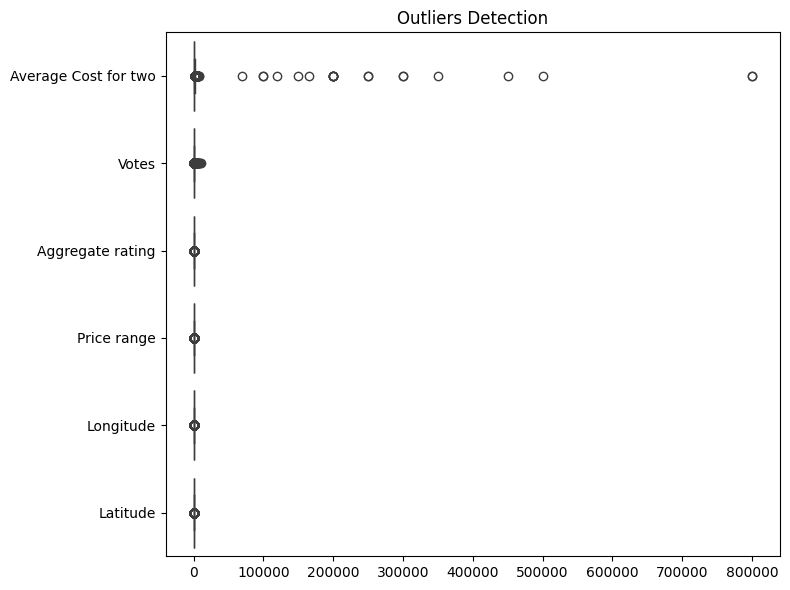

In [139]:
# Ouliers Detection Using Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns=['Average Cost for two','Votes','Aggregate rating','Price range','Longitude','Latitude']
plt.figure(figsize=(8,6))
sns.boxplot(data=df[numerical_columns],orient='h')
plt.title('Outliers Detection')
plt.tight_layout()
plt.show()

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
# Removing Outlier Using IQR
Q1=df[numerical_columns].quantile(0.25)
Q3=df[numerical_columns].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-3*IQR
upper_bound=Q3+3*IQR

for col in numerical_columns:
  median=df[col].median()
  df[col]=df[col].apply(lambda x:median if x<lower_bound[col] or x>upper_bound[col] else x)

In [142]:
import numpy as np

# Using Log Transformation For Compressing Outliers
columns_to_transform=['Average Cost for two','Votes','Aggregate rating','Price range','Longitude','Latitude']
for col in columns_to_transform:
  df[col]=df[col].apply(lambda x:np.log1p(x))

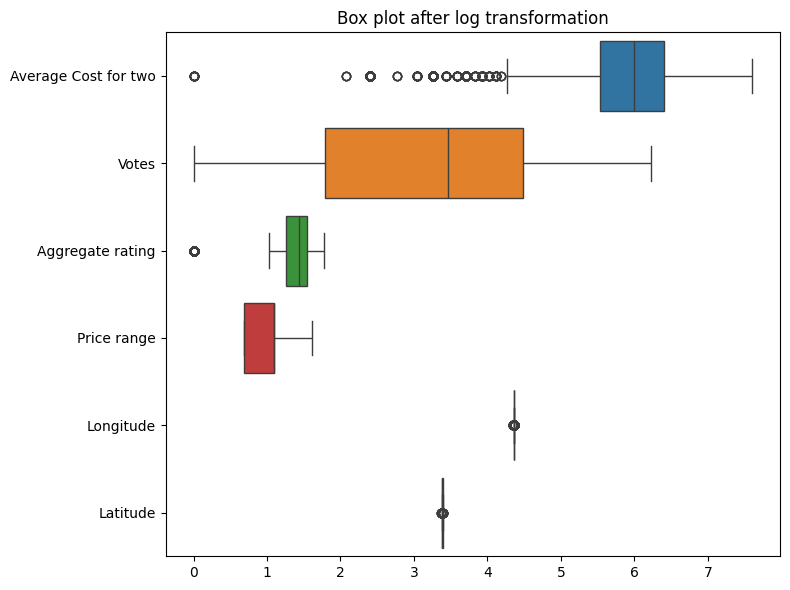

In [143]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[columns_to_transform],orient='h')
plt.title('Box plot after log transformation')
plt.tight_layout()
plt.show()

In [144]:
# Caping (Winsorization) For Remaining Outliers
from scipy.stats.mstats import winsorize

# Applying Caping
for col in columns_to_transform:
  df[col]=winsorize(df[col],limits=[0.05,0.05])

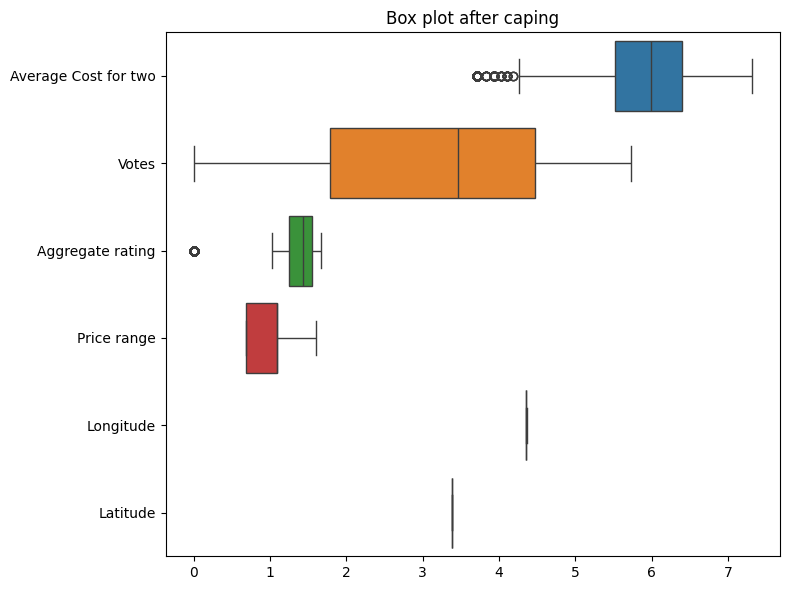

In [145]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[columns_to_transform],orient='h')
plt.title('Box plot after caping')
plt.tight_layout()
plt.show()

In [146]:
# Soft Trimming Using IQR Caping
def cap_outliers(df,columns):
  for col in columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[col]=df[col].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
  return df
# Applying On Only Selected Columns
columns_to_cap=['Average Cost for two','Aggregate rating','Longitude','Latitude']
df=cap_outliers(df,columns_to_cap)

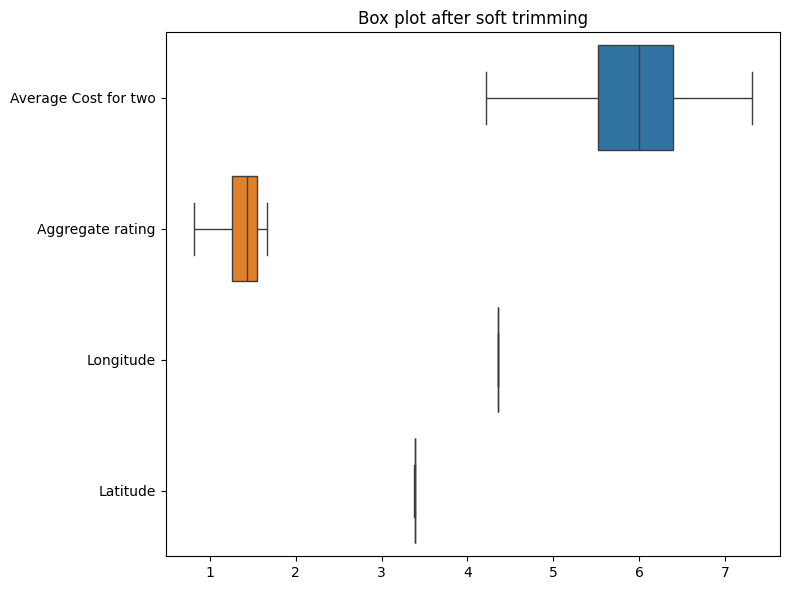

In [147]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[columns_to_cap],orient='h')
plt.title('Box plot after soft trimming')
plt.tight_layout()
plt.show()

In [148]:
# Percentage Calculation
table_booking_pct=df['Has Table booking'].value_counts(normalize=True)*100
online_delivery_pct=df['Has Online delivery'].value_counts(normalize=True)*100

In [149]:
print(table_booking_pct)
print(online_delivery_pct)

Has Table booking
0    87.875615
1    12.124385
Name: proportion, dtype: float64
Has Online delivery
0    74.337766
1    25.662234
Name: proportion, dtype: float64


In [150]:
# Compare Rating
rating_table_booking=df.groupby('Has Table booking')['Aggregate rating'].mean()
rating_online_delivery=df.groupby('Has Online delivery')['Aggregate rating'].mean()

In [151]:
print(rating_table_booking)
print(rating_online_delivery)

Has Table booking
0    1.307950
1    1.484588
Name: Aggregate rating, dtype: float64
Has Online delivery
0    1.290314
1    1.442493
Name: Aggregate rating, dtype: float64


In [152]:
# Online Delivery VS Price Range
online_delivery_price_range=df.groupby('Has Online delivery')['Price range'].mean()

print(online_delivery_price_range)

Has Online delivery
0    0.963603
1    1.041933
Name: Price range, dtype: float64


Text(0.5, 1.0, 'Percentage of Restaurants Offer Table Booking')

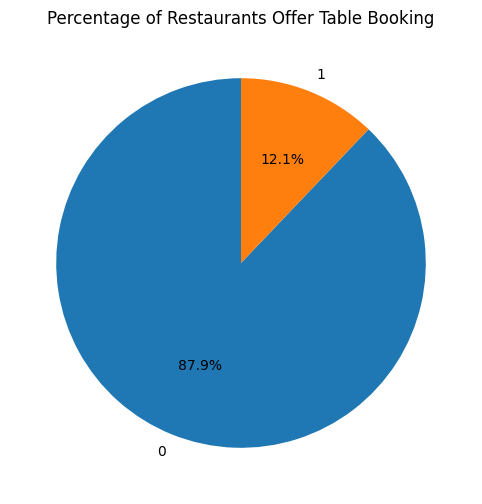

In [153]:
# Pie Chart For Percesntage Of Restaurants Offer Table Booking
plt.figure(figsize=(8,6))
plt.pie(table_booking_pct,labels=table_booking_pct.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of Restaurants Offer Table Booking')

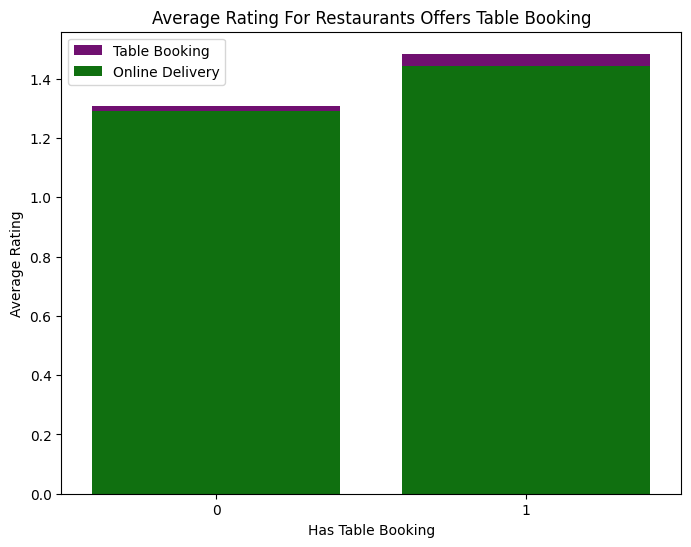

In [156]:
# Bar Chart For Average Rating
plt.figure(figsize=(8,6))
sns.barplot(x=rating_table_booking.index,y=rating_table_booking.values,color='Purple',label='Table Booking')
sns.barplot(x=rating_online_delivery.index,y=rating_online_delivery.values,color='Green',label='Online Delivery')
plt.title('Average Rating For Restaurants Offers Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

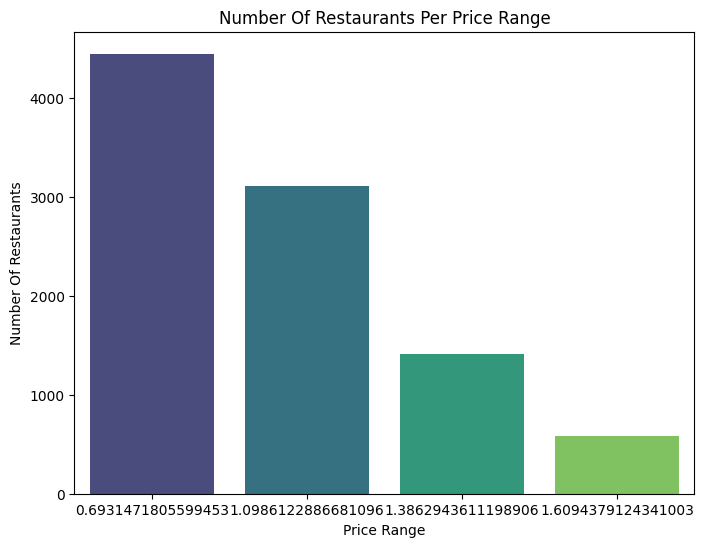

In [157]:
# Count Plot - Number Of Restaurants Per Price Range
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Price range',palette='viridis')
plt.title('Number Of Restaurants Per Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number Of Restaurants')
plt.show()

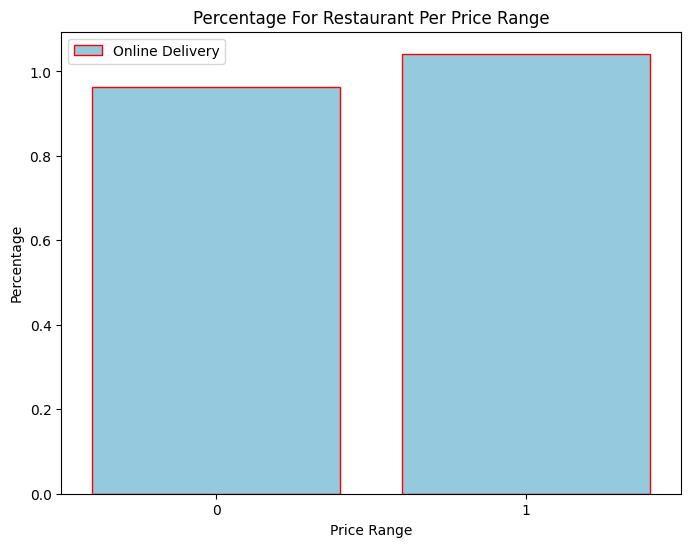

In [160]:
# Bar Chart Percentage For Restaurant Per Price Range
plt.figure(figsize=(8,6))
sns.barplot(x=online_delivery_price_range.index,y=online_delivery_price_range.values,color='Skyblue',label='Online Delivery',edgecolor='red')
plt.title('Percentage For Restaurant Per Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Task: Price Range Analysis

In [161]:
# Finding Common Price Range
common_price_range=df['Price range'].value_counts().idxmax()
print(common_price_range)

0.6931471805599453


In [162]:
# Now Calculating Average Rating Of Each Price Range
average_rating_price_range=df.groupby('Price range')['Aggregate rating'].mean()
print(average_rating_price_range)

Price range
0.693147    1.198040
1.098612    1.382330
1.386294    1.532251
1.609438    1.556467
Name: Aggregate rating, dtype: float64


In [167]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [172]:
# Identifying Color Of High Rated Price Range
highest_rated_price_range=df.groupby('Price range')['Aggregate rating'].mean().idxmax()
color_high_rated_price_range=df[df['Price range']==highest_rated_price_range]['Rating color'].mode()[0]
print(highest_rated_price_range)
print(color_high_rated_price_range)

1.6094379124341003
Yellow


# Task: Feature Engineering

In [186]:
# Extracting Additional Features
# Price Range Category
def categorize_price(price):
  if price in [1,2]:
    return 'Low'
  elif price==3:
    return 'Medium'
  else:
    return 'High'
df['price_category']=df['Price range'].apply(categorize_price)

# Has Multiple Cuisines
df['Has multiple_cuisines']=df['Cuisines'].apply(lambda x:1 if len(x.split(','))>1 else 0)

# City Popularity Score
city_popularity_score=df.groupby('City')['Restaurant ID'].count()
df['city_popularity_score']=df['City'].map(city_popularity_score)

# Price Per Person
df['price_per_person']=df['Average Cost for two']/2

# Length Of Restaurant Name
df['length_of_restaurant_name']=df['Restaurant Name'].apply(lambda x:len(x))

# Length Of Cuisine
df['length_of_cuisine']=df['Cuisines'].apply(lambda x:len(x.split(',')))

In [187]:
# Checking Columns After Feature Engineering
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'price_category', 'multiple_cuisines', 'Has multiple_cuisines',
       'city_popularity_score', 'price_per_person',
       'length_of_restaurant_name', 'length_of_cuisine'],
      dtype='object')


In [ ]:
# Encoding Categorical Features Already Done At Level 1...